#Segmentación de una Angiografía por medio del algoritmo de K-means
##José Alfonso Acosta Peñaloza - 201212570

###Introducción
En la medicina realizar diagnósticos con imágenes resulta ser indispensable en el tratamiento y prevención de enfermedades, ya que proveen un _método no invasivo_ de obtener información vital del interior del cuerpo humano. Con las tecnologías actuales de obtención de imágenes se ha llegado a la necesidad de crear y optimizar algoritmos que permitan delinear las estructuras anatómicas, así como aumentar el conocimiento de las patologías en la investigación médica. En particular los algoritmos de extracción de información de imágenes son conocidos como **algoritmos de segmentación.**

Así mismo, los métodos para llevar a cabo la segmentación varían ampliamente debido a la gran variedad de estructuras con diferentes caracteristicas, tipo de imagen y otros factores. Debido a esto, no se tiene un algoritmo que alcance resultados excelentes con todo tipo de imagen médica. El algoritmo usado en el presente proyecto es el de **K-means**, el cuál es un método que permite agrupar en k grupos un conjunto de n observaciones, donde cada observación pertenece al grupo más cercana a la media.

**Descripción**
+ Escoger K centros de clúster ya sea de manerea aleatoria o en un método heurístico.
+ Asignar a cada píxel de la imagen el clúster que minimiza la varianza entre el pixel y la media del clúster.
+ Recalcular el centro del clúster con la media de los píxeles que pertencen al clúster. 
+ Iterar hasta que se consiga una convergencia.

En el caso del proyecto se usa la diferencia absoluta de intensidad entre el píxel y el centro clúster como varianza, además de establecer el número de clústeres y los centroides de manera heurística.

**Angiografía coronaria**

Es un método de diagnóstico por imagen que utiliza rayos X y un tinte especial para observar el interior de los vasos sanguíneos. Se puede utilizar para observar arterios o venas en el corazón, el cerebro, el riñón y otras partes del cuerpo. Una angiografía se realiza para observar la forma como la sangre se mueve a través del cuerpo, verificar si hay arterias dañadas u obstruidas, entre otros diagnósticos. Las arterias coronarias son las que proporcionan sangre oxigenada al corazón, por lo cual obstrucción de éstas representa un importante porcentaje en la tasa de muerte tanto en hombres como mujeres.


###Objetivo

+ Implementar el algoritmo de K-means para análizar una angiografía coronaria con el fin de entender su alcance y restricciones.



###Desarrollo
Se usará un cuaderno de python que maneje la parte gráfica mientras que el algoritmo de K-means será implementado en C. La forma como se acopla ambos códigos será mediante manejo de archivos en ambos lenguajes, a continuación se muestra el código empleado. 

In [1]:
%pylab inline
from PIL import Image
import subprocess

Populating the interactive namespace from numpy and matplotlib


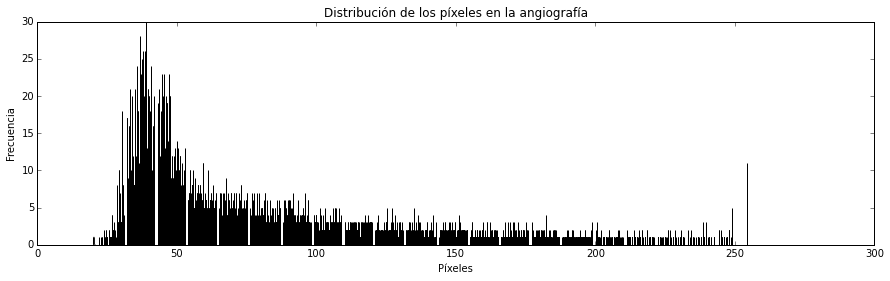

In [2]:
#Lectura de la angiografía origignal, se guarda como un arreglo que contiene en cada posición el valor de intesidad
#del píxel en escala de grises. Dónde se la información sobre la intensidad es guardada con 8 bits, de 0-255 valores. 
#Se usó la función Image.open de la librería PIL para abrir la imagen.
angio=Image.open('./ANGIO.png')
imarray=array(angio)
#Se grafica un histograma con el fin de saber cuál es la distribución de los píxeles en la angiografía
figure(figsize(15,4))
hist(imarray,bins=256)
title('Distribución de los píxeles en la angiografía')
xlabel('Píxeles')
ylabel('Frecuencia')
show()

In [3]:
#Se determina el número de filas y columnas del arreglo 
f,c=shape(imarray)
#Usando la información del histograma se determinó que serán 5 los centros de los clústeres 
#los cuales estarán ubicados en 40, 50, 80, 120 y 170. Lo anterior se decide con el fin de distribuir los centroides
#de manera uniforme teniendo en cuenta su frecuencia, donde estarán más cerca si su frecuencia es mayor.
C=[40,50,80,120,170]
n=5
#Se escribe la información del arreglo en un archivo de texto usando el siguiente formato:
# *filas
# *Columnas
# *Números de clústeres
# *Centroides
# *Valores del arreglo
file=open('Angio.txt','w')
file.write("%d %d %d %d %d %d %d %d"%(f,c,n,C[0],C[1],C[2],C[3],C[4]))
#Escritura de los elementos del arreglo uno a uno
for i in range(f):
    for j in range(c):
        file.write('%d '%imarray[i,j])
file.close()

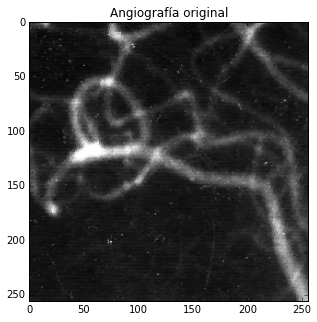

In [4]:
#Se muestra la angiografía coronaria original.
figure(figsize(5,5))
imshow(imarray,cmap='gray')
title('Angiografía original')
show()

In [5]:
#Se realiza un llamado al ejecutable de c que realiza la segmentación de la angiografía coronaria 
#El cuál recibe una matriz con la información necesaria para realizar la segmentación. (ver código en la carpeta)
subprocess.call('./angio.out')

0

In [6]:
#Se carga la información del archivo de salida
fileout=genfromtxt('./AngioR.txt')

In [7]:
#Se guarda la información en un arreglo para su posterior análisis
imarrayR=zeros((256,256))
k=0
for i in range(256):
    for j in range(256):
        imarrayR[i,j]=fileout[k]
        k+=1

(-0.5, 255.5, 255.5, -0.5)

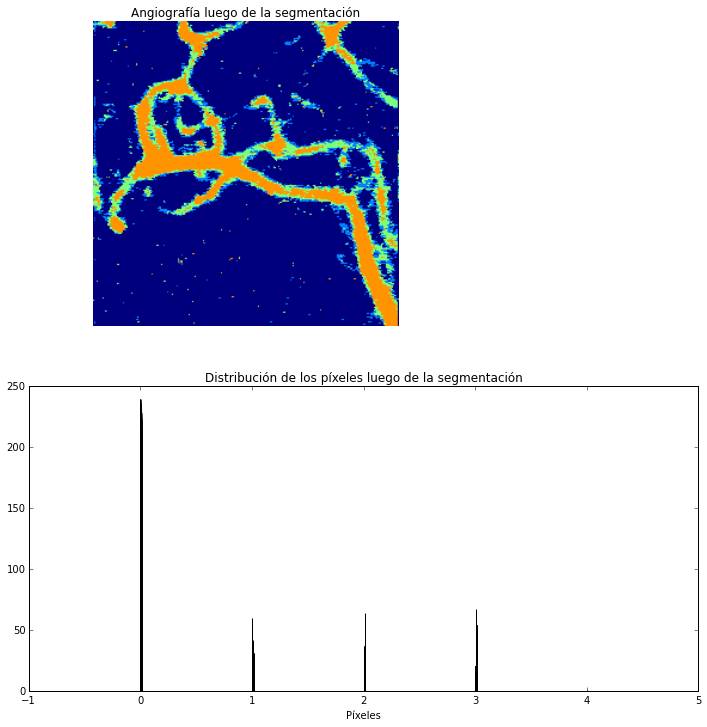

In [9]:
#Grafica el resultado obtenido
fig=figure(figsize(12,12))
ax1 =subplot2grid((2,3),(0,0),rowspan=1,colspan=2)
ax2 =subplot2grid((2,3),(1,0),rowspan=1,colspan=3)
ax1.imshow(imarrayR)
ax2.hist(imarrayR,bins=256)
ax1.set_title('Angiografía luego de la segmentación')
ax2.set_title('Distribución de los píxeles luego de la segmentación')
ax2.set_xlabel('Píxeles')
ax2.set_xlim(-1,5)
ax1.set_ylabel('Frecuencia')
ax1.axis('off')

###Conclusiones
Al revisar los resultados de la angiografía se obtuvieron las siguientes conclusiones: 

* Se encontró que la segmentación no fue optima ya que se pierden detalles de la angiografía original. Lo anterior se debe a la forma como se escogió el número de clúster y los centros de éstos, ya que en la angiografía se tiene para cada arteria diferentes intensidades dependiendo de factores como la profundidad de las arterias, el grosor, la obstrucción y finalmente la calidad de la angiografía.

* Además se tiene que la distribución final quedó principalmente 4 clúteres, mientras que uno de ellos (centrado en 170) está contenido dentro los anteriores. Esto se debe a que a partir de 170 las frecuencias de cada píxel no son comparables con los anteriores clústeres. En la imagen de la angiografía segmentada se observa los 4 principales clústeres mientras que el 5 se encuentra en algunos píxeles.

* Finalmente se concluye que algoritmo de K-means a pesar de lograr una segmentación tiene limitaciones producto de la forma de agrupamiento, ya que según la forma en que se ingresen los clústeres se pueden tener resultados incorrectos.

###Referencias

1. J.A.Hartigan,M.A.Wong (1979). Algorithm AS 136: A K-Means Clustering Algorithm. 

2. MedlinePlus (http://www.nlm.nih.gov/medlineplus/spanish/ency/article/003876.htm). Angiografía coronaria

3. I. Garcia (2010). Aportaciones a la segmentación y caracterización de Imágenes Médicas 3D